In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

C:\Users\palre\anaconda3\envs\trendsense-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load cleaned stock price data
df = pd.read_csv('../data/processed/tesla_stock_cleaned.csv', parse_dates=['Date'])

# Prepare columns for Prophet
df_prophet = df[['Date', 'close']].rename(columns={'Date': 'ds', 'close': 'y'})
df_prophet.head()


,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [5]:
# Initialize Prophet model
model = Prophet(daily_seasonality=True)

# Fit model to historical data
model.fit(df_prophet)


17:27:00 - cmdstanpy - INFO - Chain [1] start processing
17:27:01 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Create future DataFrame for prediction (e.g., next 90 days)
future = model.make_future_dataframe(periods=90)

# Forecast
forecast = model.predict(future)


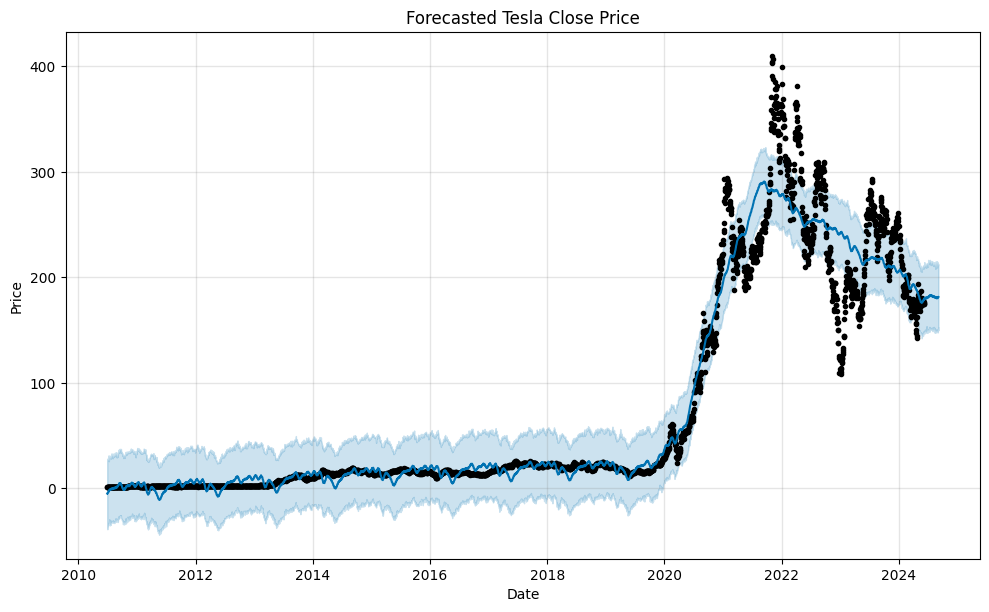

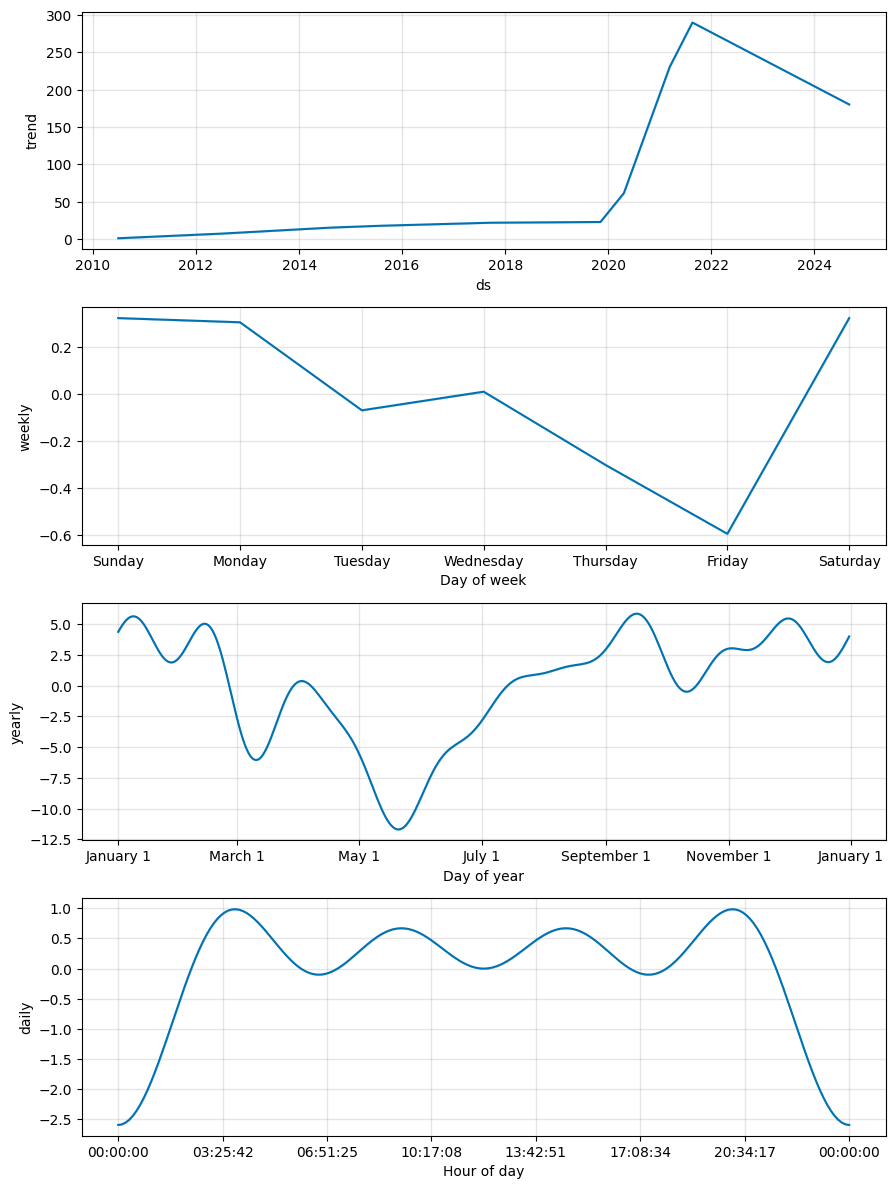

In [7]:
# Forecast plot
fig1 = model.plot(forecast)
plt.title("Forecasted Tesla Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Components plot (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()
